<h1><center>  DATA SCIENCE PROJECT </center></h1>
<center> Kristjan Pekk, Pärt Alango, Yaiza Rubio Chavida </center>
<center> University of Tartu </center>

<h1><center>  HIV ANALYSIS </center></h1>
<center>Study of HIV epidemiology indicators and treatments for children and adolescents.</center>


<center> The two datasets used in this project were taken from: https://data.unicef.org/resources/dataset/hiv-aids-statistical-tables/. </center>
    
    
<center> To get better results for our project, we removed some data from the original datasets to have only the data needed to achieve our goals. </center>

<center> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
import random
pd.options.mode.chained_assignment = None  # default='warn' | for disposing of unneccesary errors

First of all, we analyzed a dataset with HIV indicators from children and adolescents, depending on the continent, sex, age(0-19) and the year (1990-2019). 

We realized that our datasets have dots for decimal separators and comma for the thousand values. Moreover, it includes some values without dots or commas. After trying lots of different ideas, we finally change commas in the original dataset to single space before converting it to a csv file. We made this change because we had many problems when plotting and converting values.

Then, we reduce it to study years from 2010 to 2019 and ages from 0-14, because we have no data about previous years and ages in the second dataset, so we couldn´t compare them. We also saw that some columns were not very useful for our analysis, so we eliminated them as well as incomplete rows. 


In [2]:
indicators=pd.read_csv("Epidemiology.csv" ,sep=";", encoding='latin-1', )
indicators.shape

(240428, 12)

In [3]:
indicators.drop(indicators.loc[indicators['Age']!='Age 0-14'].index, inplace=True)
for i in range (1990, 2010):
    indicators.drop(indicators.loc[indicators['Year']==i].index, inplace=True)
    i+=1
indicators.drop("UNICEF Region", axis=1, inplace=True)
indicators.drop("Data source", axis=1, inplace=True)
indicators.drop("Type", axis=1, inplace=True)
indicators.drop("ISO3", axis=1, inplace=True)
indicators.drop("Age", axis=1, inplace=True)

#indicators.to_csv("ReduceData.csv", index=False, encoding='utf8')

print(indicators.shape)
indicators.head()

(14820, 7)


,Country/Region,Indicator,Year,Sex,Value,Lower,Upper
120,Global,Estimated incidence rate (new HIV infection pe...,2010,Both,0.49,0.31,0.77
122,Global,Estimated incidence rate (new HIV infection pe...,2010,Female,0.50,0.31,0.78
124,Global,Estimated incidence rate (new HIV infection pe...,2010,Male,0.48,0.30,0.76
126,Global,Estimated incidence rate (new HIV infection pe...,2011,Both,0.42,0.27,0.67
128,Global,Estimated incidence rate (new HIV infection pe...,2011,Female,0.43,0.27,0.68


To have the data more separated, we divided this new csv file into two:
- AnnualDeaths.csv  (Estimated number of annual AIDS-related deaths of children 0-14 depending on country, sex and year (2010-2019))
- AnnualNewInfections.csv   (Estimated number of annual new HIV infections of children 0-14 depending on country, sex and year(2010-2019))

In [4]:
reduce=pd.read_csv("ReduceData.csv" ,sep=",", encoding='latin-1', )
reduce.drop(reduce.loc[reduce['Indicator']!='Estimated number of annual AIDS-related deaths'].index, inplace=True)
#reduce.to_csv("AnnualDeaths.csv", index=False, encoding='utf8')

In [5]:
reduce=pd.read_csv("ReduceData.csv" ,sep=",", encoding='latin-1', )
reduce.drop(reduce.loc[reduce['Indicator']!='Estimated number of annual new HIV infections'].index, inplace=True)
#reduce.to_csv("AnnualNewInfections.csv", index=False, encoding='utf8')

<h1>Deaths</h1>

In [6]:
deaths=pd.read_csv("AnnualDeaths.csv", sep=",", encoding='latin-1')
deaths.drop("Indicator", axis=1, inplace=True)
print(deaths.shape)
deaths.head()

(2970, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,220000,150000,360000
1,Global,2010,Female,110000,73000,180000
2,Global,2010,Male,110000,75000,180000
3,Global,2011,Both,200000,130000,330000
4,Global,2011,Female,97000,65000,160000


In [7]:
#converting data values to numeric, where applicable

for i in range(len(deaths)):
    #upper----------------------------------------------------------------------
    if("<" in str(deaths["Upper"][i])):
        deaths["Upper"][i] = int(str(deaths["Upper"][i])[1:])
    else:
        deaths["Upper"][i] = int(deaths["Upper"][i])
        
    #lower----------------------------------------------------------------------    
    if("<" in str(deaths["Lower"][i])):
        deaths["Lower"][i] = int(str(deaths["Lower"][i])[1:])
    else:
        deaths["Lower"][i] = int(str(deaths["Lower"][i]))
        
    #value----------------------------------------------------------------------    
    if("<" in str(deaths["Value"][i])):
        deaths["Value"][i] = int(str(deaths["Value"][i])[1:])
    else:    
        deaths["Value"][i] = int(str(deaths["Value"][i]))

In [8]:
#calculating the averages
vals = deaths["Value"]
genders = deaths["Sex"]

total_M, count_M,total_F, count_F, total_B, count_B= 0,0,0,0,0,0

i = 0
for v in vals:
    if genders[i] == "Male":
        total_M += int(v)
        count_M += 1
    elif genders[i] == "Female":
        total_F += int(v)
        count_F += 1
    else:
        total_B += int(v)
        count_B += 1
    i+=1
    
print("     Male                Female               Both")       
print(str(total_M/count_M) + " | " + str(total_F/count_F) + " | " + str((total_B/count_B))+"\n")

print("VALUE mean " + str(deaths["Value"].mean()))
print("VALUE std " + str(deaths["Value"].std())+"\n")

print("UPPER mean "+str(deaths.Upper.mean()))
print("UPPER std " + str(deaths["Upper"].std())+"\n")

print("LOWER mean "+str(deaths.Lower.mean()))
print("LOWER std " + str(deaths["Lower"].std())+"\n")

     Male                Female               Both
2855.4949494949497 | 2786.59595959596 | 5577.242424242424

VALUE mean 3739.777777777778
VALUE std 15645.526023698043

UPPER mean 5897.3569023569025
UPPER std 25705.3425225964

LOWER mean 2524.7003367003367
LOWER std 10549.752030072816



0     220000
3     200000
6     180000
9     160000
12    140000
15    130000
18    120000
21    110000
24    100000
27     95000
Name: Value, dtype: object


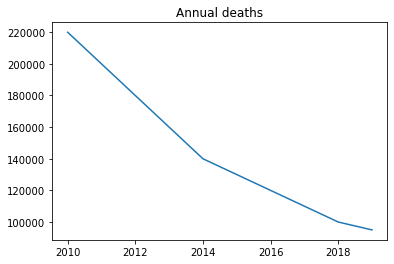

In [9]:
b= deaths[(deaths["Country/Region"] == "Global")]
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y= b[(b["Sex"] == "Both")]["Value"]
plt.plot(years,y)
plt.title("Annual deaths")
print(y)

In this graph, we can see that fortunately the global number of deaths caused by HIV are decreasing with the years.

In 2010, there were 220000 children deaths and by 2019 this number has decreased to 95000.

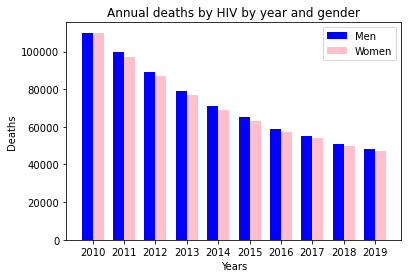

In [10]:
men = b[(b["Sex"] == "Male")]["Value"]
women= b[(b["Sex"] == "Female")]["Value"]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_ylabel('Deaths')
ax.set_title('Annual deaths by HIV by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

From the previous graph, we can easily see how the global number of deaths is a bit greater for boys than for girls.

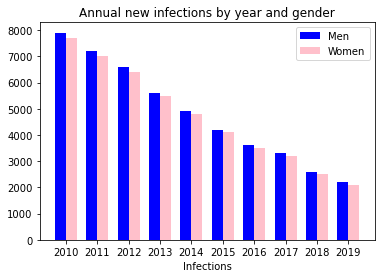

In [11]:
c= deaths[(deaths["Country/Region"] == "Kenya")]

men = c[(c["Sex"] == "Male")]["Value"]
women= c[(c["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_xlabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

In the previous graph, we showed the number of cases in Kenya, we can make the same graph with any country just changing the name of the country.

NOTE: You will not find all the countries because many of them have no data or it is incomplete.

C:\Users\hppp\anaconda3\envs\ITDS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


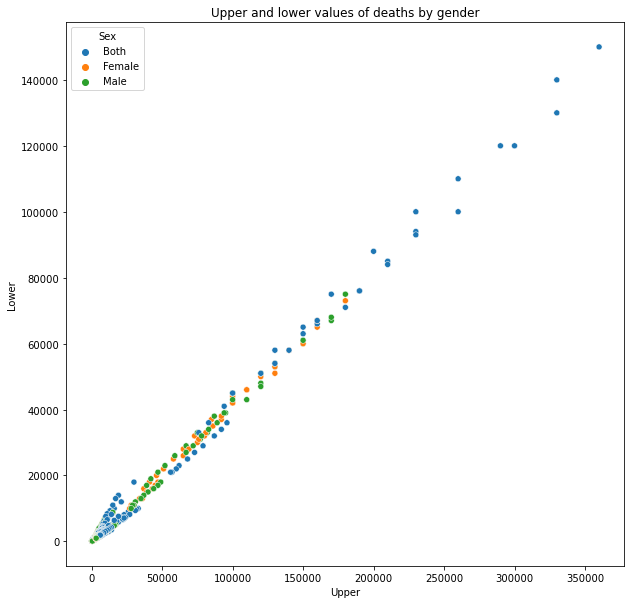

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Upper and lower values of deaths by gender")
sns.scatterplot('Upper', 'Lower', data=deaths, hue='Sex')
plt.show()

In [13]:
countries = []
values = []
for country in deaths["Country/Region"].unique():
    avg, mean, count, total = 0,0,0,0
    for i in range(len(deaths)):
        if deaths["Country/Region"][i] == country:
            count += 1
            total += deaths["Value"][i]
        
    countries.append(country)
    values.append(total/count)

The following graph has been divided into 2 for better  data representation


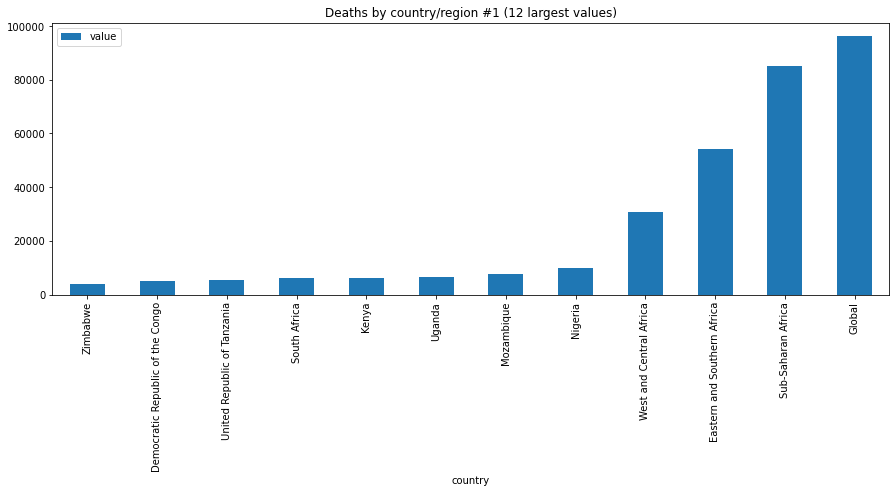

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
df = pd.DataFrame({'country':countries, 'value':values})
print("The following graph has been divided into 2 for better  data representation")
ax = df.sort_values(by=["value"])[len(values)-12:].plot.bar(x='country', y='value', rot=90).set_title("Deaths by country/region #1 (12 largest values)")
bx = df.sort_values(by=["value"])[:len(values)-12].plot.bar(x='country', y='value', rot=90).set_title("Deaths by country/region #2")

<h1>Infections</h1>

In [ ]:
infections=pd.read_csv("AnnualNewInfections.csv", sep=",", encoding='latin-1')
infections.drop("Indicator", axis=1, inplace=True)
print(infections.shape)
infections.head()

In [ ]:
#converting data values to numeric, where applicable
i = 0
for val in infections["Value"]:
    try:
        infections["Value"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            infections["Value"][i] = int(val[1:]) - 1 #remove "<" and decrease by 1
            
    i+=1
#---------------------------upper---------------------------------
i=0
for val in infections["Upper"]:
    try:
        infections["Upper"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            infections["Upper"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
    i+=1
#---------------------------lower--------------------------------
i=0
for val in infections["Lower"]:
    try:
        infections["Lower"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            infections["Lower"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1    
    i+=1

In [ ]:
infections.head()

In [ ]:
b= infections[(infections["Country/Region"] == "Global")]
y= b[(b["Sex"] == "Both")]["Value"]
plt.title("HIV-related deaths by year")
plt.plot(years,y)
#print(y)

In this graph, we can see that fortunately the new total cases of HIV are decreasig with the years.

In 2010, there were 310000 new cases and in 2019 only 150000, the number was reduced in half.

In [ ]:
men = b[(b["Sex"] == "Male")]["Value"]
women= b[(b["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_ylabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

From the previous graph, we can easily see how the number new cases of HIV of children is a bit greater for boys than for girls.

In [ ]:
c= infections[(infections["Country/Region"] == "Kenya")]

men = c[(c["Sex"] == "Male")]["Value"]
women= c[(c["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_xlabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

In the previous graph, we showed the number of cases in Kenya, we can make the same graph with any country just changing the name of the country.

NOTE: You will not find all the countries because many of them have no data or it is incomplete.

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=infections, hue='Sex')
plt.title("Upper and lower values of new infections by gender")
plt.show()

In [ ]:
countries = []
values = []
for country in infections["Country/Region"].unique():
    avg, mean, count, total = 0,0,0,0
    for i in range(len(infections)):
        if infections["Country/Region"][i] == country:
            count += 1
            total += infections["Value"][i]
        
    countries.append(country)
    values.append(total/count)

In [ ]:
print("The following graph has been divided into 2 for better data representation")
plt.rcParams["figure.figsize"] = [15, 5]
df = pd.DataFrame({'country':countries, 'value':values})
ax = df.sort_values(by=["value"])[len(values)-12:].plot.bar(x='country', y='value', rot=90).set_title("New infections by country/region #1 (12 highest values)") #rotation to see the labels

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
df = pd.DataFrame({'country':countries, 'value':values})
ax = df.sort_values(by=["value"])[:len(values)-12].plot.bar(x='country', y='value', rot=90).set_title("New infections by country/region #2") #rotation to see the labels

<h1>Treatments</h1>

Our second UNICEF dataset contained the percentage and the numbers of children(0-14 years) with HIV receiving ART treatment. In this dataset we had different indicators, some of them were the number of children, and the other ones were represented
by percentage. So we realized we couldn´t mix the values to get good results. To solve this problem we joined data as shown below. In this way, we simplify a lot the original data due to most of the information was twice. 

In [ ]:
treatments=pd.read_csv("Treatment.csv", sep=";", encoding='latin-1')
print(treatments.shape)
treatments.head()

In [ ]:
country = "Afghanistan"
c= treatments[(treatments["Country"] == country)]
plt.xlabel('Years')
plt.ylabel('Percentages of cases with treatment')
plt.title("HIV treatment efforts in " + country)
plt.bar(years, height= c["Percentage"] , width=0.8, bottom=None, align='center', color="purple")

In [ ]:
plt.xlabel('Years')
plt.ylabel('Number of treatments')
plt.title("Number of treatments in " + country)
plt.bar(years, height= c["Number"] , width=0.8, bottom=None, align='center', color = "green")

We can see how the number of treatments are increasing with the years as well as the percentages of cases covered. We can analyze different countries just changing the name of the country.

In [ ]:
#random.uniform(start, stop): returns float between start and stop

#for every row
for i in range(len(treatments)):
     #upper
    upper = treatments["Upper"][i]
    #in this case, only "<1":
    if str(upper).startswith("<"):
        treatments["Upper"][i] = random.uniform(0.5,float(upper[1:])) #random from 0.5 to value (aka 1)
    #in this case, only ">95":
    elif str(upper).startswith(">"):
        treatments["Upper"][i] = random.uniform(float(upper[1:]), 100) #random from value(aka 95) to 
    else:
        treatments["Upper"][i] = float(treatments["Upper"][i])
        
    
    #lower
    lower = treatments["Lower"][i]
    if str(lower).startswith("<"): #aka <1:
        treatments["Lower"][i] = random.uniform(0,0.5) #random from 0 to 0.5 
    elif str(lower).startswith(">"):
        treatments["Lower"][i] = random.uniform(float(lower[1:]), treatments["Upper"][i]) #random from value to upper (cant be higher than upper!)
    else:
        treatments["Lower"][i] = float(treatments["Lower"][i])
        
    #percentage
    percentage = treatments["Percentage"][i]
    if str(percentage).startswith("<") or str(percentage).startswith(">") : #aka <1 or >95
        treatments["Percentage"][i] = random.uniform(treatments["Lower"][i], treatments["Upper"][i]) #random from lower to higher
    else:
        treatments["Percentage"][i] = float(treatments["Percentage"][i])
    
    
    #print(str(treatments["Percentage"][i]) + " | "+ str(treatments["Lower"][i]) + " | "+str(treatments["Upper"][i]))
    

In [ ]:
#treatments- graphing
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=treatments, hue='Region')
plt.title('Upper and lower bounds of new infections by region')
plt.show()

Finally, we separated one dataset to get one with analysis divided in 7 UNICEF regions. These regions are: Eastern and Southern Africa, Sub-Saharan Africa, East and North Africa, Latin America and Caribbean, Middle  South Asia, East Asia and Pacific, West and Central Africa with values of years from 2010-2019.

In [ ]:
regions=pd.read_csv("Global.csv", sep=";", encoding='latin-1', header=None, names= ["Region","Year","Percentage","Lower","Upper", "Number"])
print(regions.shape)
regions.head()

In [ ]:
#converting neccesary values to numeric

#some values are still in the shape of ">95"
for i in range(len(regions)):
    #upper
    if str(regions["Upper"][i]).startswith(">"):
        regions["Upper"][i] = float(regions["Upper"][i][1:])
    else:
        regions["Upper"][i] = float(regions["Upper"][i])
        
    #percentage
    regions["Percentage"][i] = float(regions["Percentage"][i])
    
    #lower
    regions["Lower"][i] = float(regions["Lower"][i])
    
    #number
    regions["Number"][i] = int(regions["Number"][i])

In [ ]:
c= regions[(regions["Region"] == "Global")]

fig, axs = plt.subplots(4, 2)
axs[0, 0].bar(years, height= regions[(regions["Region"] == "East Asia and Pacific")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[0, 0].set_title("East Asia and Pacific")
axs[0, 1].bar(years, height= regions[(regions["Region"] == "Eastern and Southern Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[0, 1].set_title("Eastern and Southern Africa")
axs[1, 0].bar(years, height= regions[(regions["Region"] == "Latin America and Caribbean")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[1, 0].set_title("Latin America and Caribbean")
axs[1, 1].bar(years, height= regions[(regions["Region"] == "Middle East and North Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[1, 1].set_title("Middle East and North Africa")
axs[2, 0].bar(years, height= regions[(regions["Region"] == "South Asia")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[2, 0].set_title("South Asia")
axs[2, 1].bar(years, height= regions[(regions["Region"] == "Sub-Saharan Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[2, 1].set_title("Sub-Saharan Africa")
axs[3, 0].bar(years, height= regions[(regions["Region"] == "West and Central Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[3, 0].set_title("West and Central Africa")
axs[3, 1].bar(years, height= regions[(regions["Region"] == "Global")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[3, 1].set_title("Global")
axs[0,0].set_xlabel("East Asia and Pacific")


for ax in axs.flat:
    ax.set(xlabel='', ylabel='Number')
# Hide x labels and tick labels for top plots and y ticks for right plots.

fig.tight_layout()


In this graph, we can see how the number of treatments covered per year change depending on the region. 
In the one shown below, we can see the percentage of the treatments covered.

In [ ]:
c= regions[(regions["Region"] == "Global")]

fig, axs = plt.subplots(4, 2)
axs[0, 0].bar(years, height= regions[(regions["Region"] == "East Asia and Pacific")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[0, 0].set_title("East Asia and Pacific")
axs[0, 1].bar(years, height= regions[(regions["Region"] == "Eastern and Southern Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[0, 1].set_title("Eastern and Southern Africa")
axs[1, 0].bar(years, height= regions[(regions["Region"] == "Latin America and Caribbean")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[1, 0].set_title("Latin America and Caribbean")
axs[1, 1].bar(years, height= regions[(regions["Region"] == "Middle East and North Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[1, 1].set_title("Middle East and North Africa")
axs[2, 0].bar(years, height= regions[(regions["Region"] == "South Asia")]["Number"] , width=0.8, bottom=None, align='center', color = "purple")
axs[2, 0].set_title("South Asia")
axs[2, 1].bar(years, height= regions[(regions["Region"] == "Sub-Saharan Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[2, 1].set_title("Sub-Saharan Africa")
axs[3, 0].bar(years, height= regions[(regions["Region"] == "West and Central Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[3, 0].set_title("West and Central Africa")
axs[3, 1].bar(years, height= regions[(regions["Region"] == "Global")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[3, 1].set_title("Global")


for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Percentage')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
#still need to work on that graph
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=regions, hue='Region')
plt.show()

<h1>Using ML methods to predict the count of new infections for the next year.</h1>

For this task, we will use AnnualNewInfections.csv.
We need to split the data into training and testing sets and then train a classifier to make predictions about the next year.

We could use years as features and values as labels. The accuracies I have gotten so far are not very good but I don't know why.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

infections=pd.read_csv('AnnualNewInfections.csv', sep=',', encoding='latin-1')
features = infections['Year']
features = features.values.reshape(-1, 1)
labels = infections['Value']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(10):
    clf = RandomForestClassifier(n_estimators=100, max_features=1)
    clf.fit(X_train, y_train)
    print("Score is", clf.score(X_test, y_test))

<center> Thank you </center>